In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font", family= 'Noto Sans CJK JP')

from sklearn.tree import export_graphviz

import graphviz

from subprocess import call
from IPython.display import Image

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,classification_report
# Concrete IRIS 체질검사

In [23]:
df_raw=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/IRIS.csv", encoding='euc-kr')
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
df_raw_x=df_raw.drop("SPECIES", axis=1, inplace=False)

In [25]:
df_raw_y=df_raw["SPECIES"]

In [26]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size=0.3, random_state=6659)

In [27]:
print("분할 전 설명변수 데이터:", df_raw_x.shape)
print("분할 후 설명변수 데이터: Train", df_train_x.shape, " Test", df_test_x.shape)

분할 전 설명변수 데이터: (150, 4)
분할 후 설명변수 데이터: Train (105, 4)  Test (45, 4)


In [28]:
tree_uncust=DecisionTreeClassifier(max_depth=4, min_samples_split=10, criterion="gini",min_samples_leaf=5,random_state=1234)
tree_uncust.fit(df_train_x,df_train_y)

print("Accuracy on training set: {:.3f}".format(tree_uncust.score(df_train_x,df_train_y)))
print("Accuracy on test set: {:.3f}".format(tree_uncust.score(df_test_x,df_test_y)))

Accuracy on training set: 0.971
Accuracy on test set: 0.844


In [29]:
y_pred=tree_uncust.predict(df_test_x)
print("Accuracy:{0:.3f}\n".format(tree_uncust.score(df_test_x, df_test_y)))
print("Test Confusion Matrix:\n{}".format(confusion_matrix(df_test_y , y_pred)))

print(classification_report(df_test_y, y_pred, digits=3))

Accuracy:0.844

Test Confusion Matrix:
[[15  0  0]
 [ 0 11  1]
 [ 0  6 12]]
              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        15
  versicolor      0.647     0.917     0.759        12
   virginica      0.923     0.667     0.774        18

    accuracy                          0.844        45
   macro avg      0.857     0.861     0.844        45
weighted avg      0.875     0.844     0.845        45



In [18]:
v_feature_name=df_train_x.columns
df_importance=pd.DataFrame()
df_importance["Feature"]= v_feature_name
df_importance["importance"]= tree_uncust.feature_importances_

In [19]:
df_importance.sort_values("importance",ascending=False, inplace= True)
df_importance.round(3)

,Feature,importance
2,PETAL_LENGTH,1.0
0,SEPAL_LENGTH,0.0
1,SEPAL_WIDTH,0.0
3,PETAL_WIDTH,0.0


Text(0, 0.5, '설명변수')

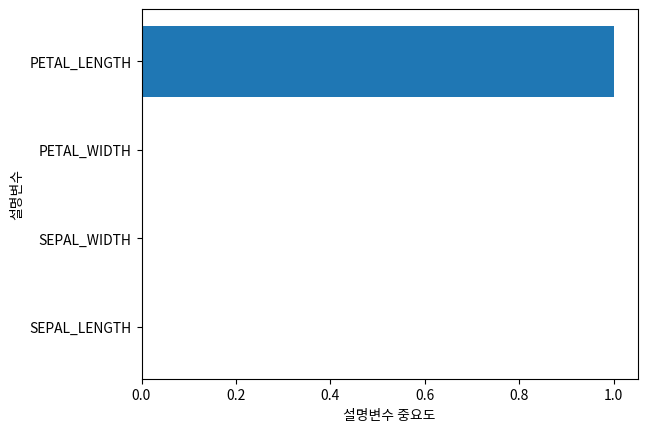

In [20]:
df_importance.sort_values("importance",ascending=True, inplace= True)
coordinates= range(len(df_importance))
plt.barh(y= coordinates, width= df_importance["importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    object 
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

In [5]:
df_raw.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,...,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,15.709703,20.323250,103.050469,807.735937,0.099358,0.123252,0.122144,0.066977,0.186772,0.062679,...,18.542406,27.225594,123.221625,1133.463438,0.137678,0.308713,0.352927,0.145487,0.305097,0.087156
std,3.745788,4.150729,25.835984,391.969297,0.014249,0.057207,0.084822,0.041732,0.027485,0.007190,...,5.182210,6.050052,35.960154,640.979627,0.023316,0.175225,0.214449,0.067292,0.069367,0.020076
min,7.691000,9.710000,47.920000,170.400000,0.052630,0.026750,0.000000,0.000000,0.127400,0.049960,...,8.678000,12.020000,54.490000,223.600000,0.085670,0.050360,0.000000,0.000000,0.156500,0.055040
25%,13.050000,17.460000,84.845000,523.900000,0.090240,0.081132,0.052770,0.029538,0.166900,0.057450,...,14.657500,23.275000,95.525000,653.525000,0.122675,0.180275,0.182950,0.090868,0.258700,0.073475
50%,15.125000,20.215000,100.100000,713.050000,0.098570,0.115300,0.110850,0.065265,0.184650,0.061445,...,17.730000,26.880000,118.850000,969.200000,0.138050,0.276950,0.339750,0.152700,0.295800,0.082640
75%,18.520000,22.500000,121.550000,1075.250000,0.108050,0.155650,0.169550,0.091777,0.202700,0.066705,...,22.420000,30.937500,148.850000,1538.500000,0.151200,0.405675,0.483675,0.197100,0.328125,0.097745
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


In [6]:
df_raw.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [7]:
df_raw_x=df_raw.drop("diagnosis", axis=1, inplace=False)

In [8]:
df_raw_y=df_raw["diagnosis"]

In [9]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size=0.4, random_state=6659)

In [10]:
print("분할 전 설명변수 데이터:", df_raw_x.shape)
print("분할 후 설명변수 데이터: Train", df_train_x.shape, " Test", df_test_x.shape)

분할 전 설명변수 데이터: (320, 30)
분할 후 설명변수 데이터: Train (192, 30)  Test (128, 30)


## 데이터를 불러와서 기술통계량과 type과 행과열 개수를 확인해주었습니다. 그 다음 df_raw 데이터를 x,y로 불리한 후 6:4의 training 데이터와 test 데이터로 나누어주었습니다. 분할 전에는 320,30 이지만 6:4로 나눠져서 192.30, 128,30이 된 것을 알 수 있습니다.

## 데이터 결측치를 확인해주었지만 결측치는 존재하지않았고, training으로 사용될 데이터가 smote 기법을 사용하더라도 매우 작은 관계로 이상치 제거는 해주지 않았습니다.

In [11]:
from imblearn.over_sampling import SMOTE

print(df_raw.value_counts(["diagnosis"]),"\n")
print("diagnosis=1 비율", df_raw.value_counts(df_raw["diagnosis"]==1)/len(df_raw))

plt.figure(figsize=(10,8))
df_raw['color']=np.where(df_raw["diagnosis"]==1, "red","blue")



diagnosis
음성           212
양성           108
dtype: int64 

diagnosis=1 비율 diagnosis
False    1.0
dtype: float64


<Figure size 1000x800 with 0 Axes>

In [12]:
sm=SMOTE(sampling_strategy='auto')

x_resampled, y_resampled =sm.fit_resample(df_train_x, df_train_y)

print('Over-Sampling 전:\n', df_train_y.value_counts(),"\n")
print('Over-Sampling 후 Train X:{}'.format(x_resampled.shape))
print('Over-Sampling 후 Train Y:{}\n'.format(y_resampled.shape))
print("Over-Sampling 후 '1':{}".format(sum(y_resampled==1)))
print("Over-Sampling 후 '0':{}".format(sum(y_resampled==0)))


Over-Sampling 전:
 음성    132
양성     60
Name: diagnosis, dtype: int64 

Over-Sampling 후 Train X:(264, 30)
Over-Sampling 후 Train Y:(264,)

Over-Sampling 후 '1':0
Over-Sampling 후 '0':0


In [13]:
y_resampled.value_counts()

음성    132
양성    132
Name: diagnosis, dtype: int64

## 양성과 음성에 대한 목표변수의 데이터가 불균형을 이루고 있습니다. 이럴 경우는 과적합이 발생하기 때문에 이를 막고자 smote기법을 사용하여 비교적 부족한 양성 데이터를 늘려서 50:50으로 데이터 균형을 맞추어 주었습니다. 최초 132:60이지만 value_count()로 데이터가 132:132 가 된 것을 알 수 있습니다.

In [14]:
tree_uncust=DecisionTreeClassifier(random_state=6659)
tree_uncust.fit(x_resampled,y_resampled)

print("Accuracy on training set: {:.3f}".format(tree_uncust.score(x_resampled,y_resampled)))
print("Accuracy on test set: {:.3f}".format(tree_uncust.score(df_test_x,df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.914


In [15]:
print(tree_uncust.get_params().keys())
print(tree_uncust.get_params().values())

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])
dict_values([0.0, None, 'gini', None, None, None, 0.0, 1, 2, 0.0, 6659, 'best'])


## 파라미터값은 정하지 않고, 난수 6659만 부여하고, 모델을 구축해보았습니다.

In [16]:
train_accuracy=[]; test_accuracy=[]
para_depth=[depth for depth in range(3,13)]

for v_max_depth in para_depth :
    tree= DecisionTreeClassifier(max_depth=v_max_depth, random_state=6659)
    tree.fit(x_resampled, y_resampled)
    train_accuracy.append(tree.score(x_resampled,y_resampled))
    test_accuracy.append(tree.score(df_test_x,df_test_y))

In [17]:
df_accuracy_depth= pd.DataFrame()
df_accuracy_depth["Depth"]=para_depth
df_accuracy_depth["TrainScore"]= train_accuracy
df_accuracy_depth["TestScore"]=test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainScore,TestScore
0,3,0.989,0.938
1,4,0.996,0.922
2,5,0.996,0.930
3,6,1.000,0.914
4,7,1.000,0.914
5,8,1.000,0.914
6,9,1.000,0.914
7,10,1.000,0.914
8,11,1.000,0.914
9,12,1.000,0.914


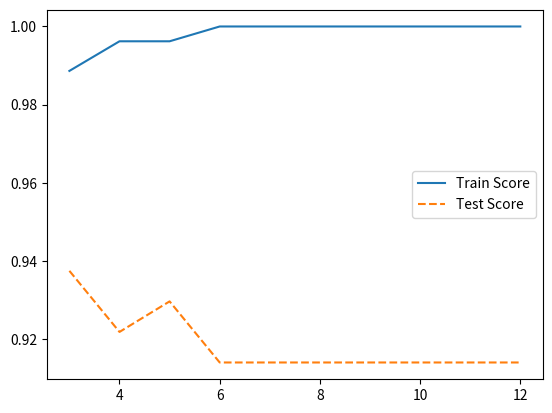

In [18]:
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_depth, test_accuracy, linestyle="--", label="Test Score")
plt.legend()

## 의사결정나무에서 최적 파라미터를 지정해주기 위해서 깊이 3부터 12까지 for문을 통하여 돌려주고, 시각화하여 확인하였습니다. 데이터의 수가 매우 적기때문에 깊이가 깊으면 과적합이 발생할 것이라고 생각하여서 깊이는 4를 지정해주었습니다.

In [19]:
train_accuracy=[]; test_accuracy=[]
para_split=[n_split*2 for n_split in range(2,15)]

for v_min_samples_split in para_split :
    tree= DecisionTreeClassifier(max_depth=4, min_samples_split=v_min_samples_split, random_state=6659)
    tree.fit(x_resampled, y_resampled)
    train_accuracy.append(tree.score(x_resampled, y_resampled))
    test_accuracy.append(tree.score(df_test_x,df_test_y))

In [20]:
df_accuracy_split= pd.DataFrame()
df_accuracy_split["MinSampleSplit"]=para_split
df_accuracy_split["TrainScore"]= train_accuracy
df_accuracy_split["TestScore"]=test_accuracy
df_accuracy_split.round(3)

,MinSampleSplit,TrainScore,TestScore
0,4,0.996,0.922
1,6,0.996,0.922
2,8,0.992,0.914
3,10,0.992,0.914
4,12,0.992,0.914
5,14,0.992,0.914
6,16,0.973,0.922
7,18,0.973,0.922
8,20,0.973,0.922
9,22,0.973,0.922


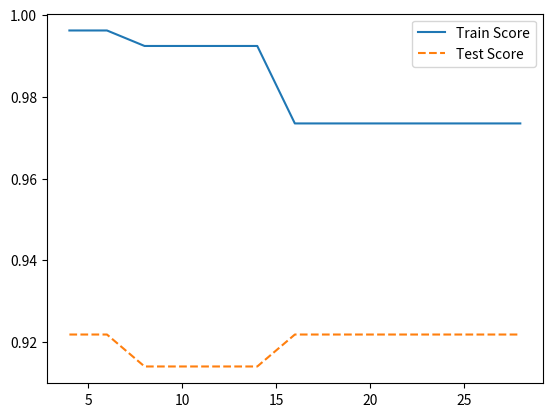

In [21]:
plt.plot(para_split, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_split, test_accuracy, linestyle="--", label="Test Score")
plt.legend()

## 의사결정나무의 min_samples_split에 최적 파라미터를 찾아주기 위해 이전에 했단 depth=4만 추가하여 4,6,8...28 까지 부여해서 돌려보았습니다. 이 또한 매우 큰 값은 과적합 위험이 있어서 test데이터가 안정되는 구간인 8을 선택하였습니다.

In [22]:
train_accuracy=[]; test_accuracy=[]
para_leaf=[n_leaf*2 for n_leaf in range(1,15)]

for v_min_samples_leaf in para_leaf :
    tree= DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf, max_depth=4, min_samples_split=8, random_state=6659)
    tree.fit(x_resampled, y_resampled)
    train_accuracy.append(tree.score(x_resampled, y_resampled))
    test_accuracy.append(tree.score(df_test_x,df_test_y))

In [23]:
df_accuracy_depth= pd.DataFrame()
df_accuracy_depth["MinSampleLeaf"]=para_leaf
df_accuracy_depth["TrainScore"]= train_accuracy
df_accuracy_depth["TestScore"]=test_accuracy
df_accuracy_depth.round(3)

,MinSampleLeaf,TrainScore,TestScore
0,2,0.989,0.914
1,4,0.981,0.914
2,6,0.981,0.914
3,8,0.958,0.922
4,10,0.951,0.922
5,12,0.943,0.922
6,14,0.936,0.906
7,16,0.936,0.906
8,18,0.936,0.906
9,20,0.936,0.906


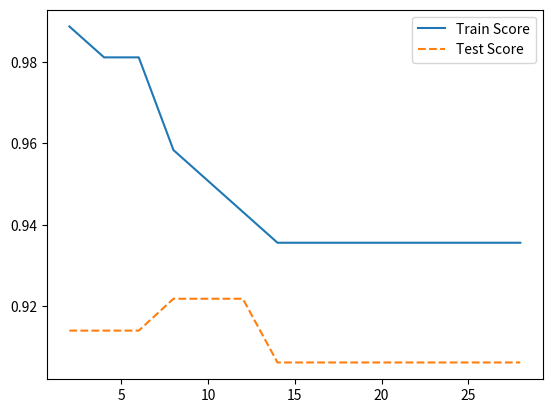

In [24]:
plt.plot(para_leaf, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_leaf, test_accuracy, linestyle="--", label="Test Score")
plt.legend()

## 의사결정나무의 최적 min_samples_leaf 를 찾아주기 위해 for문을 통해 2,4,6,8....28까지 값을 부여하고 시각화하여 확인해보았습니다. split보다 작은 값을 부여해야 하기때문에 5를 선정하였습니다.

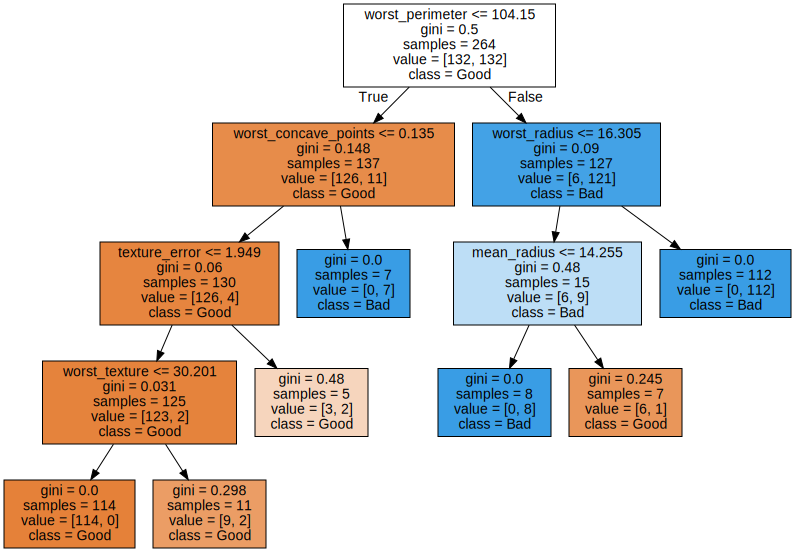

In [25]:
v_feature_name=x_resampled.columns
tree_final= DecisionTreeClassifier(max_depth=4, min_samples_split=8, min_samples_leaf=5,random_state=6659)
tree_final.fit(x_resampled, y_resampled)
export_graphviz(tree_final, out_file="tree_final.dot",class_names=["Good","Bad"], feature_names= v_feature_name, impurity=True, filled=True)

with open("tree_final.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))


## 최적 파라미터를 찾은 최종모델의 결정나무 전체 구조를 시각화하여 확인하였습니다. 최초에 데이터가 132:132 씩있고 최초 분기는  worst_perimeter가 105.079보다 작은지 큰지에 대해 class가 나누어지고, 거의 대부분의 데이터가 분리된 것을 알 수 있습니다. 

In [26]:
y_pred=tree_final.predict(df_test_x)
print("Accuracy:{0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Test Confusion Matrix:\n{}".format(confusion_matrix(df_test_y , y_pred)))

print(classification_report(df_test_y, y_pred, digits=3))

Accuracy:0.914

Test Confusion Matrix:
[[39  9]
 [ 2 78]]
              precision    recall  f1-score   support

          양성      0.951     0.812     0.876        48
          음성      0.897     0.975     0.934        80

    accuracy                          0.914       128
   macro avg      0.924     0.894     0.905       128
weighted avg      0.917     0.914     0.912       128



## 전체 데이터 128개 중 7개를 제외하고는 모두 선별하였습니다. 정확도는 94.5이고, 양성의 재현율은 0.854, 음성의 재현율 1, 정밀도는 양성이 1 음성이 0.92입니다. 조화평균 또한 매우 높습니다.

In [27]:
df_importance=pd.DataFrame()
df_importance["Feature"]= v_feature_name
df_importance["importance"]= tree_final.feature_importances_

In [28]:
df_importance.sort_values("importance",ascending=False, inplace= True)
df_importance.round(3)

,Feature,importance
22,worst_perimeter,0.805
27,worst_concave_points,0.100
0,mean_radius,0.044
20,worst_radius,0.034
11,texture_error,0.011
21,worst_texture,0.005
16,concavity_error,0.000
28,worst_symmetry,0.000
26,worst_concavity,0.000
25,worst_compactness,0.000


Text(0, 0.5, '설명변수')

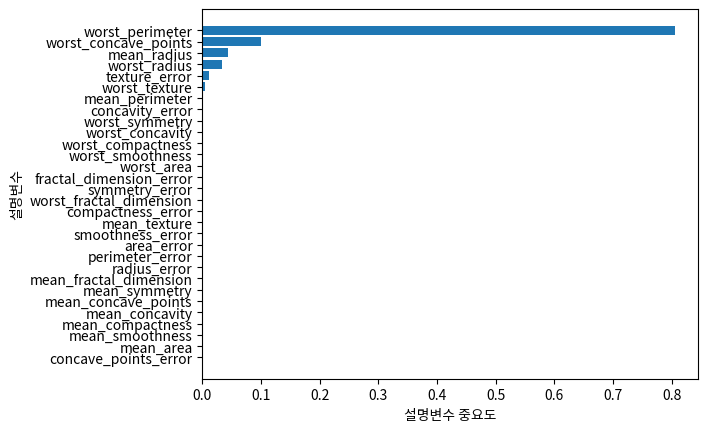

In [29]:
df_importance.sort_values("importance",ascending=True, inplace= True)
coordinates= range(len(df_importance))
plt.barh(y= coordinates, width= df_importance["importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

## 성능은 매우 좋았습니다. 하지만 변수 중요도를 보았을 때 하나의 변수만 결과를 너무 잘 설명하기에 좋은 모델이라고는 할 수 없습니다. 파라미터를 조절하면 조금씩 변수 중요도가 바뀌지만 확인 결과 worst_perimeter가 압도적인 설명력을 나타내고 있습니다.

In [30]:
# 의사결정나무 GridSearch를 통한 최적 파라미터 결정

In [31]:
estimator= DecisionTreeClassifier()
param_grid={"max_depth":para_depth,"min_samples_split":para_split, "min_samples_leaf":para_leaf}

grid_dt=GridSearchCV(estimator,param_grid,scoring="accuracy", n_jobs= -1)
grid_dt.fit(x_resampled, y_resampled)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter:\n{}".format(grid_dt.best_params_))
print("\nbest score:\n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(max_depth=11, min_samples_leaf=4, min_samples_split=10)

best parameter:
{'max_depth': 11, 'min_samples_leaf': 4, 'min_samples_split': 10}

best score:
0.951


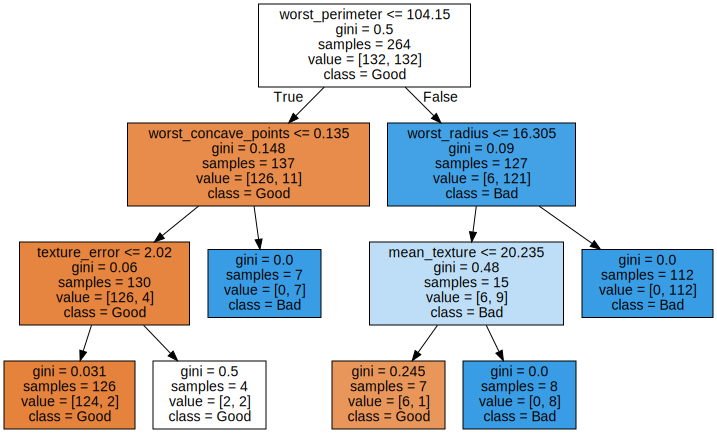

In [32]:
v_feature_name=x_resampled.columns
tree_final= DecisionTreeClassifier(max_depth=3, min_samples_split=6, min_samples_leaf=4,random_state=6659)
tree_final.fit(x_resampled, y_resampled)
export_graphviz(tree_final, out_file="tree_final.dot",class_names=["Good","Bad"], feature_names= v_feature_name, impurity=True, filled=True)

with open("tree_final.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))


In [33]:
y_pred=tree_final.predict(df_test_x)
print("Accuracy:{0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Test Confusion Matrix:\n{}".format(confusion_matrix(df_test_y , y_pred)))

print(classification_report(df_test_y, y_pred, digits=3))

Accuracy:0.938

Test Confusion Matrix:
[[40  8]
 [ 0 80]]
              precision    recall  f1-score   support

          양성      1.000     0.833     0.909        48
          음성      0.909     1.000     0.952        80

    accuracy                          0.938       128
   macro avg      0.955     0.917     0.931       128
weighted avg      0.943     0.938     0.936       128



## GridSearch를 돌리더라도 결과는 큰 차이가 없지만 GridSearch 자체의 문제가 있었습니다 leaf은 split 보다 많아질 수 없음에도 불과하고 최적 파라미터를  min_samples_leaf': 6, 'min_samples_split': 4 의 결과를 출력하였습니다. 현업이였다면 사용하지 않았겠지만 연습이기에 모델에 적용하여 돌려보았습니다.

In [34]:
df_importance=pd.DataFrame()
df_importance["Feature"]= v_feature_name
df_importance["importance"]= tree_final.feature_importances_

In [35]:
df_importance.sort_values("importance",ascending=False, inplace= True)
df_importance.round(3)

,Feature,importance
22,worst_perimeter,0.807
27,worst_concave_points,0.100
1,mean_texture,0.044
20,worst_radius,0.034
11,texture_error,0.015
0,mean_radius,0.000
16,concavity_error,0.000
28,worst_symmetry,0.000
26,worst_concavity,0.000
25,worst_compactness,0.000


Text(0, 0.5, '설명변수')

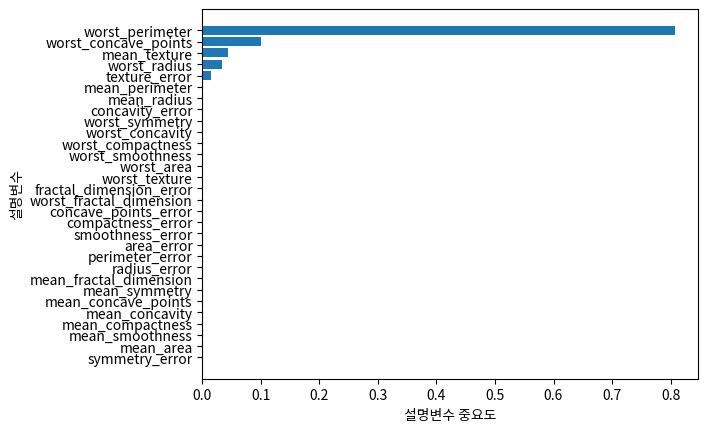

In [36]:
df_importance.sort_values("importance",ascending=True, inplace= True)
coordinates= range(len(df_importance))
plt.barh(y= coordinates, width= df_importance["importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

## GridSearch를 통해 돌리더라도 worst_perimeter 변수만 중요도가 압도적으로 높게 나오는 것을 알 수 있었습니다.